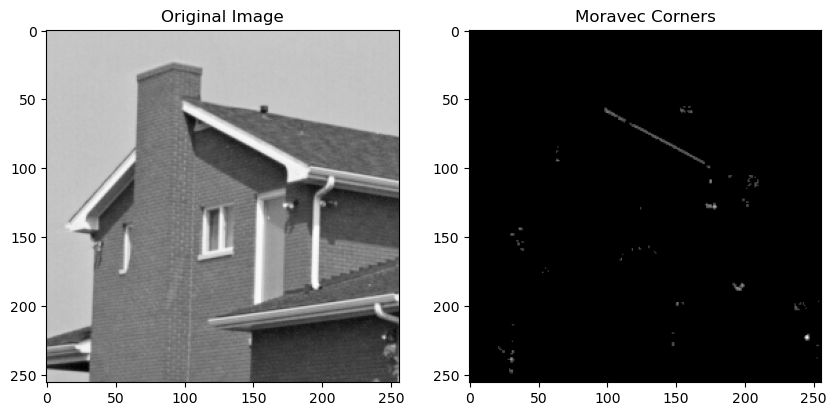

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 이미지 로드 및 grayscale 변환 (cv2 사용)
def load_image_as_gray(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return np.array(img, dtype=np.float32)

# 2. 모라벡 코너 검출 함수 (수정됨)
def moravec_corner_detection(image, window_size=3, threshold=1000):
    h, w = image.shape
    offset = window_size // 2
    corners = np.zeros((h, w))

    # 네 방향(수평, 수직, 대각선)으로 강도 차이를 계산
    directions = [(1, 0), (0, 1), (1, 1), (-1, 1)]

    # 경계에서 방향 이동까지 고려한 범위 설정
    for y in range(offset, h - offset - 1):  # -1 추가
        for x in range(offset, w - offset - 1):  # -1 추가
            min_ssd = float('inf')

            # 각 방향에 대해 SSD 계산
            for dy, dx in directions:
                ssd = 0
                for i in range(-offset, offset + 1):
                    for j in range(-offset, offset + 1):
                        curr_pixel = image[y + i, x + j]
                        shifted_pixel = image[y + i + dy, x + j + dx]
                        ssd += (curr_pixel - shifted_pixel) ** 2
                min_ssd = min(min_ssd, ssd)

            corners[y, x] = min_ssd

    # 임계값 적용
    corners[corners < threshold] = 0
    return corners

# 3. 결과 시각화
def plot_results(original_img, corners):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_img, cmap='gray')
    
    plt.subplot(1, 2, 2)
    plt.title("Moravec Corners")
    plt.imshow(corners, cmap='gray')
    plt.show()

# 4. 메인 실행
if __name__ == "__main__":
    image_path = "./image/house.bmp"  # 실제 이미지 경로로 변경
    gray_image = load_image_as_gray(image_path)
    
    window_size = 3
    threshold = 5000
    corner_response = moravec_corner_detection(gray_image, window_size, threshold)
    
    plot_results(gray_image, corner_response)